# With this notebook we will:
## 1. Install packages needed for root
## 2. Download a binary root that compiled in google drive "colaboratory" environement
## 3. Modify the PATH in order to tell python where to look for pyROOT
## 4. Finally, a basic analysis example with pyROOT

##### Author: Jose Ruiz
##### Maintainer: Jose Ruiz
##### Developed at: Universidad de Antioquia


### 1. Install packages needed for root

In [ ]:
!apt-get install git dpkg-dev cmake g++ gcc binutils libx11-dev libxpm-dev libxft-dev libxext-dev tar gfortran subversion

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libxext-dev is already the newest version (2:1.3.3-1).
libxext-dev set to manually installed.
libxft-dev is already the newest version (2.3.2-1).
cmake is already the newest version (3.10.2-1ubuntu2.18.04.1).
dpkg-dev is already the newest version (1.19.0.5ubuntu2.3).
dpkg-dev set to manually installed.
g++ is already the newest version (4:7.4.0-1ubuntu2.3).
g++ set to manually installed.
gcc is already the newest version (4:7.4.0-1ubuntu2.3).
gcc set to manually installed.
gfortran is already the newest version (4:7.4.0-1ubuntu2.3).
git is already the newest version (1:2.17.1-1ubuntu0.7).
libx11-dev is already the newest version (2:1.6.4-3ubuntu0.2).
libx11-dev set to manually installed.
tar is already the newest version (1.29b-2ubuntu0.1).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
The following add

### 2. Mount the drive to get the root binary and untar it 

In [ ]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
# After executing the cell above, Drive
# files will be present in "/content/drive/My Drive".
!ls "/content/drive/Shared drives/PyROOT_in_Google"

BasicAnalysis.ipynb	  FLUTEMI.WAV
BasicPyROOTExample.ipynb  HistogrammingInROOT.ipynb
Chi2Fitting.ipynb	  MCSimpleIntegrator.ipynb
Data5.root		  monje-a-lo-bonzo-blanco-y-negro.png
DatosParcial2		  piano-C5.wav
DatosProyectoMontecarlo   root_build_google_yikes.tar
DatosResonancia.root	  TrimmedTree.root
FFT_imagen.ipynb	  TTreeExcercise.ipynb
FFT.ipynb


In [ ]:
!tar -xf "/content/drive/Shared drives/PyROOT_in_Google/root_build_google_yikes.tar"

In [ ]:
!ls -ltrh

total 12K
drwxr-xr-x 44 root root 4.0K Sep 20  2018 root_build
drwxr-xr-x  1 root root 4.0K Jul 10 16:29 sample_data
drwx------  5 root root 4.0K Jul 28 16:38 drive



### 3. Modify the PATH in order to tell python where to look for pyROOT


In [ ]:
import sys
sys.path.append("/content/root_build/")
sys.path.append("/content/root_build/bin/")
sys.path.append("/content/root_build/include/")
sys.path.append("/content/root_build/lib/")

### Importing necessary libraries

In [ ]:
import ROOT
import numpy as np
import matplotlib.pyplot as plt

Welcome to JupyROOT 6.14/04


#Proyecto técnicas de Montecarlo


*   Andrés Gomez
*   Jhoan Eusse

In [ ]:
def Landau(x,u,s): #u: mu, s: sigma
  Land = ROOT.TMath.Landau(x,u,s,True) #the n
  return Land

#Definiendo ecuación Chi cuadrado
def Chi(xe,xt): #xe=experimental, xt=teorico
    chi=[]
    for i in range(len(xe)):
        if xe[i] != 0:
          chi_s = ((xe[i]-xt[i])**2)/abs(xe[i])
          chi.append(chi_s)
    return np.array(chi)

### Reading tree in root file

In [ ]:
#DataChain=ROOT.TChain("SystemTree")
#DataChain.Add("/content/drive/My Drive/UdeA/2020_1_b/JhoanCamiloEusse.root")

DataChain=ROOT.TChain("SystemTree")
DataChain.Add("/content/drive/My Drive/ComputacionMontecarlo/JhoanCamiloEusse.root")


DataChain2=ROOT.TChain("SystemTree")
DataChain2.Add("/content/drive/My Drive/ComputacionMontecarlo/AndresFelipeGomez.root")

1

### Getting the number of events contained in the tree

In [ ]:
NumberOfEventsToCheck=DataChain2.GetEntries()
print("We are going to analyze ",NumberOfEventsToCheck, " events")

We are going to analyze  85000  events


In [ ]:
Histo = ROOT.TH1F( 'Histo1', 'Histograma Jhoan', 250, 0, 1800 )
freq=[]
for entry in DataChain:
  xv=entry.x
  Histo.Fill(xv)
  freq.append(xv)

Histo2 = ROOT.TH1F( 'Histo2', 'Histograma Andres', 250, 0, 1800 )
freq2=[]
for entry in DataChain2:
  xv=entry.x
  Histo2.Fill(xv)
  freq2.append(xv)

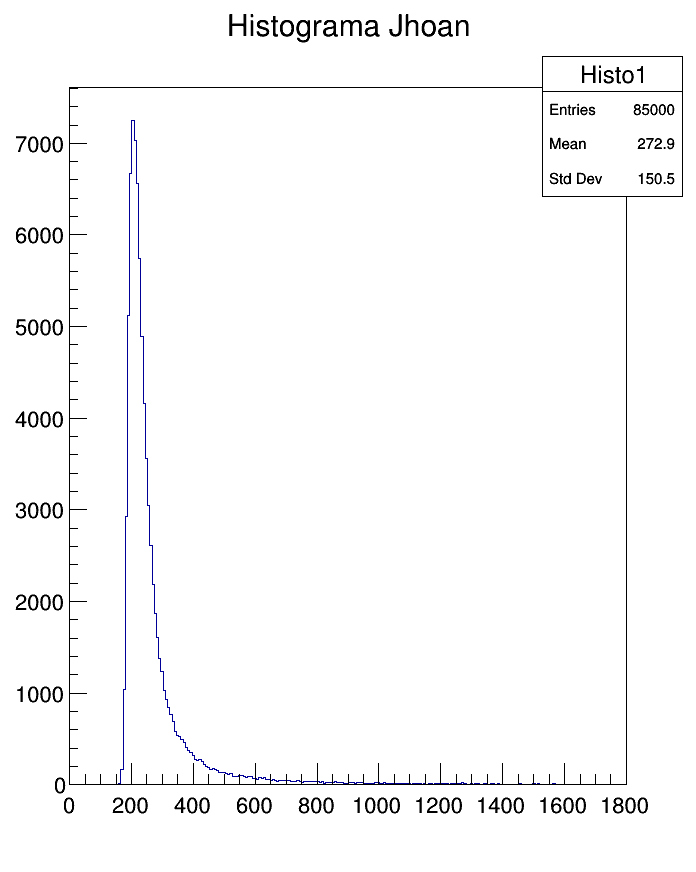

In [ ]:
c1 = ROOT.TCanvas( 'can1', 'Histograma Eusse', 200, 10, 700, 900 )
c1.SetFillColor( 0 )
Histo.Draw()
c1.Update()
ROOT.gROOT.GetListOfCanvases().Draw()


Warning in <TCanvas::Constructor>: Deleting canvas with same name: can1


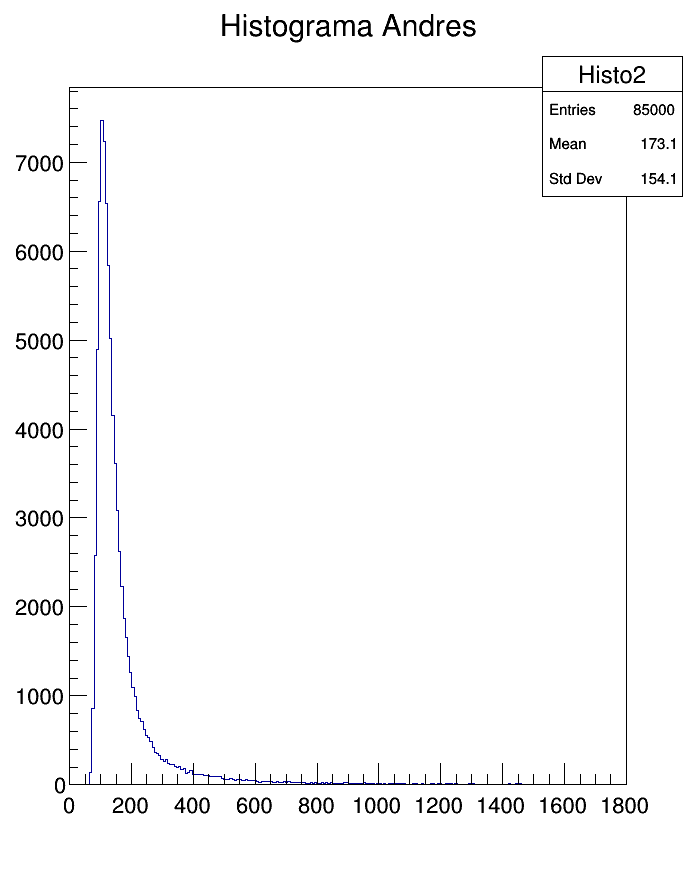

In [ ]:
c2 = ROOT.TCanvas( 'can1', 'Histograma Andres', 200, 10, 700, 900 )
c2.SetFillColor( 0 )
Histo2.Draw()
c2.Update()
ROOT.gROOT.GetListOfCanvases().Draw()

**Algoritmo de Metrópolis**



1.   Elegir un $x_0$ aleatorio garantizando que $p(x_0)$ sea diferente de cero, (distribución uniforme entre 50 y 1800).
2.   Elegir un $x_n$ aleatorio garantizando que $p(x_n)$ sea diferente de cero, (distribución uniforme entre 50 y 1800).
3. Caluclar $\Delta S = - ln( \frac{p(x_n)}{p(x_0)})$
4. Si $\Delta S < 0$ guardar estado $x_n$
5. Si $\Delta S > 0$ generar $r$ aleatorio (distribución uniforme entre 0 y 1), si $r < \frac{p(x_n)}{p(x_0)}$ gurdar $x_n$ como estado
6. Si no se dan 4. o 5. volver a punto 2.
7. Para la posterior iteración cambia $x_0$ por $x_n$ y $x_n$ por un nuevo numero aleatorio $x_{n+1}$ y ya nos fijamos en $
- ln( \frac{p(x_{n+1})}{p(x_n)})$ y $\frac{p(x_{n+1})}{p(x_n)}$   

Todos estos pasos se repiten hasta tener 85000 estados almacenados, la función densidad de probabilidad $p(x)$ usada es la función de distribución de probabilidad de Landau con parámetros $\mu$ y $\sigma$ que se optimizan.





**Chi cuadrado**

$$\chi^{2}=\sum\frac{(D_{i}-C_{i})^{2}}{|Ci|}$$

In [ ]:
def Metroplis(mu,si,k):
  u=mu #mu
  s=si #sigma
  X=[]
  x0=np.random.uniform(50,1800,1)[0]
  if Landau(x0,u,s) == 0 :
    while Landau(x0,u,s) == 0 :
      x0=np.random.uniform(50,1800,1)[0]
  X.append(x0)

 
 
  ##print(X[-1])
  

  #Metropolis algorithm
  while len(X)< len(freq2):
    xs=np.random.uniform(50,1800,1)[0]
    if Landau(xs,u,s) != 0:
      dels=-np.log(Landau(xs,u,s)/Landau(X[-1],u,s))
      if dels < 0:
        X.append(xs)
      elif dels > 0:
        r=np.random.uniform(0,1,1)[0]
        if r < Landau(xs,u,s)/Landau(X[-1],u,s):
          X.append(xs)

 

  if k==0 : #Histograma Eusse
    binesrt1=[]

    for i in range (250):
      if Histo.GetBinContent(i) != 0:
        binesrt1.append(Histo.GetBinContent(i))

    histopy=np.histogram(X, bins=len(binesrt1))
    binespy=histopy[0]

    return binespy, np.array(binesrt1), X

  if k==1 : #Histograma Andres
    binesrt2=[]

    for i in range (250):
      if Histo2.GetBinContent(i) != 0:
        binesrt2.append(Histo2.GetBinContent(i))

    histopy=np.histogram(X, bins=len(binesrt2))
    binespy=histopy[0]

    return binespy, np.array(binesrt2), X


Chi cuadrado mínimo Jhoan: 179.3738778079039
Lista de parametros optimos [mu,sigma]:
[205.0, 7.0]
Chi cuadrado mínimo Andres: 125.53856493230963
Lista de parametros optimos [mu,sigma]:
[105.0, 6.0]


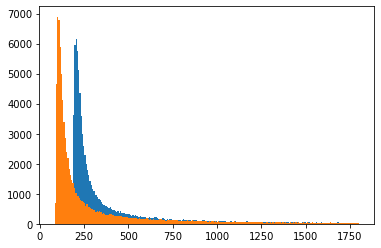

Warning in <TROOT::Append>: Replacing existing TH1: Histocc (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: can3
Warning in <TROOT::Append>: Replacing existing TH1: Histocc (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: can4


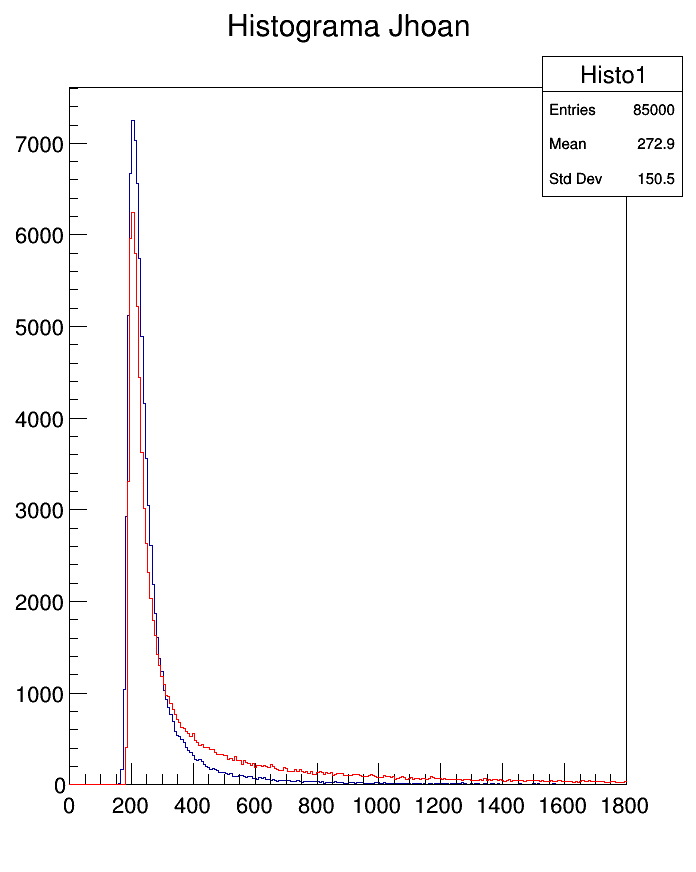

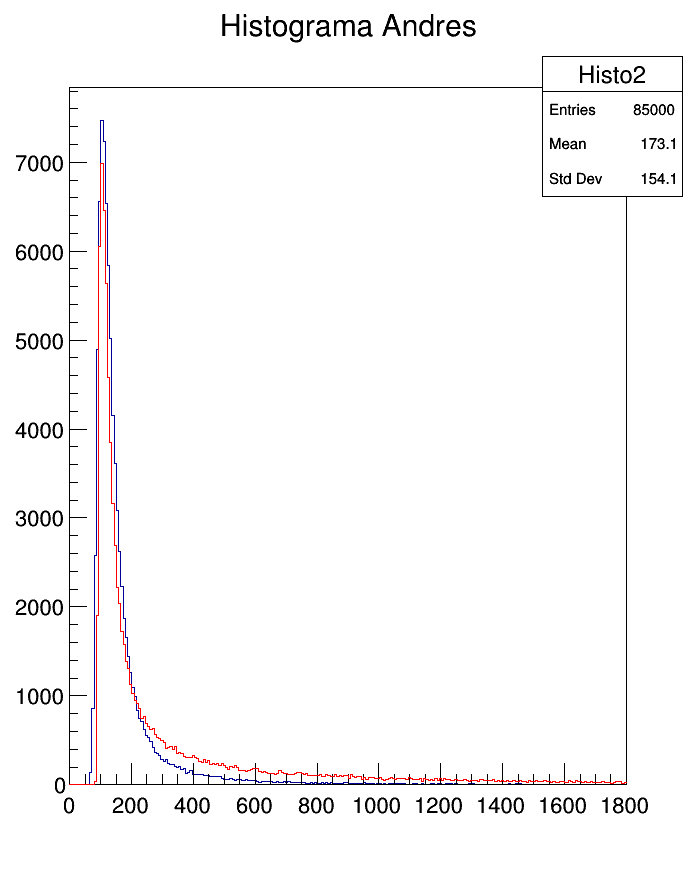

In [ ]:
chi1=[] #CHI JHOAN
chi2=[] #CHI ANDRES
parametros1=[] #PARAMETROS JHOAN

U1=np.linspace(190,220,5) 
S1=np.linspace(5,7,5)

U2=np.linspace(105,110,5)
S2=np.linspace(5,7,5)
parametros2=[] #PARAMETROS ANDRES

kk=[0,1]


for k in kk: 
  if k==0 :
    for i in  U1:
      for j in S1:
        a=[]
        expe, teo, cc= Metroplis(i,j,k)
        CH=Chi(expe,teo)
        chi1.append(np.sum(CH))
        a.append(i)
        a.append(j)
        parametros1.append(a)
    Minimo1=min(chi1)
    print("Chi cuadrado mínimo Jhoan: {}".format(Minimo1/len(expe)))
    for p in range(len(parametros1)):
      if chi1[p]== Minimo1:
        print("Lista de parametros optimos [mu,sigma]:")
        print(parametros1[p])
        #print(p)
        a,b,c= Metroplis(parametros1[p][0],parametros1[p][1],k)
        plt.hist(c, bins=len(expe))
    
        Histoc = ROOT.TH1F( 'Histocc', 'Histograma ', 250, 0, 1800 )
        for i in range(len(cc)):
          Histoc.Fill(c[i])
        c3 = ROOT.TCanvas( 'can3', 'Histograma Eusse', 200, 10, 700, 900 )
        c3.SetFillColor( 0 )
        Histo.Draw()
        c3.Update()
        ROOT.gROOT.GetListOfCanvases().Draw()

        Histoc.Draw("same")
        Histoc.SetLineColor(2)
        c3.Update()
        ROOT.gROOT.GetListOfCanvases().Draw()

  if k==1 :
    for i in  U2:
      for j in S2:
        a=[]
        expe, teo, cc= Metroplis(i,j,k)
        CH=Chi(expe,teo)
        chi2.append(np.sum(CH))
        a.append(i)
        a.append(j)
        parametros2.append(a)

    Minimo2=min(chi2)
    print("Chi cuadrado mínimo Andres: {}".format(Minimo2/len(expe)))
    for p in range(len(parametros2)):
      if chi2[p]== Minimo2:
        print("Lista de parametros optimos [mu,sigma]:")
        print(parametros2[p])
        #print(p)
        a,b,c= Metroplis(parametros2[p][0],parametros2[p][1],k)
        plt.hist(c, bins=len(expe))
    
        Histocc = ROOT.TH1F( 'Histocc', 'Histograma A ', 250, 0, 1800 )
        for i in range(len(cc)):
          Histocc.Fill(c[i])
        c4 = ROOT.TCanvas( 'can4', 'Histograma Andres', 200, 10, 700, 900 )
        c4.SetFillColor( 0 )
        Histo2.Draw()
        c4.Update()
        ROOT.gROOT.GetListOfCanvases().Draw()

        Histocc.Draw("same")
        Histocc.SetLineColor(2)
        c4.Update()
        ROOT.gROOT.GetListOfCanvases().Draw()       

**Curva azul:** Experimental

**Curva roja:** Ajuste computacional

**Conclusiones**



*   Dada la aleatoriedad del problema, los parámetros óptimos para $\mu$ y $\sigma$ varían levemente cada vez que se ejecuta el código, lo mismo sucede para el valor mínimo de Chicuadrado.
*   Se pueden aproximar datos experimentales usando métodos computancionales que generen muestras aleatorias como es el caso del algoritmo de Metrópolis.

